In [5]:
#Imports
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

(97, 2)


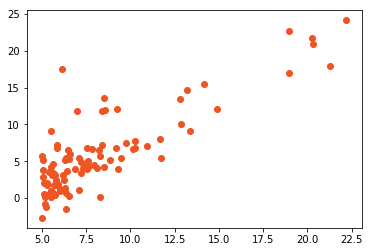

In [12]:
# Reading data
data = pd.read_csv('ex1data1.csv', header=None)
print data.shape
X = data[0].values
Y = data[1].values

plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')